## Installation

In [1]:
# pip install pyodbc
# pip install sqlalchemy

## Importation

In [2]:
import sqlalchemy as sa
import pyodbc
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency
from scipy.stats import ttest_ind
import warnings
warnings.filterwarnings("ignore")




## Data Collection and Loading (Connecting to a database on SQL Server)

In [3]:

#setting up connections to the database with necessary credentials
server = 'dap-projects-database.database.windows.net'
database = 'dapDB'
username = 'dataAnalyst_LP2'
password = 'A3g@3kR$2y'
conn_str = f'DRIVER={{ODBC Driver 18 for SQL Server}};SERVER={server};DATABASE={database};UID={username};PWD={password}'
conn = pyodbc.connect(conn_str)


In [4]:
#creating a query
cursor = conn.cursor()
query = 'SELECT TOP 3000 * FROM dbo.LP2_Telco_churn_first_3000'
cursor.execute(query)
sql_data = cursor.fetchall()
#reading xlsx and csv file into the notebook
df_test=pd.read_excel('../lp2_customer_chun\data\Telco-churn-second-2000.xlsx')
df_last=pd.read_csv('../lp2_customer_chun\data\LP2_Telco-churn-last-2000.csv')


In [5]:
# Reshape the sql_data into a 2D array with one row and 21 columns
sql_data_2d = np.reshape(sql_data, (3000, 21))

# Creating a DataFrame for df_sql dataset
df_sql = pd.DataFrame(sql_data_2d)
#Set appropriate column names for the DataFrame
column_names=['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn']
df_sql.columns=column_names
df_sql

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,False,True,False,1,False,None,DSL,False,...,False,False,False,False,Month-to-month,True,Electronic check,29.85,29.85,False
1,5575-GNVDE,Male,False,False,False,34,True,False,DSL,True,...,True,False,False,False,One year,False,Mailed check,56.950001,1889.5,False
2,3668-QPYBK,Male,False,False,False,2,True,False,DSL,True,...,False,False,False,False,Month-to-month,True,Mailed check,53.849998,108.150002,True
3,7795-CFOCW,Male,False,False,False,45,False,None,DSL,True,...,True,True,False,False,One year,False,Bank transfer (automatic),42.299999,1840.75,False
4,9237-HQITU,Female,False,False,False,2,True,False,Fiber optic,False,...,False,False,False,False,Month-to-month,True,Electronic check,70.699997,151.649994,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,2209-XADXF,Female,False,False,False,1,False,None,DSL,False,...,False,False,False,False,Month-to-month,False,Bank transfer (automatic),25.25,25.25,False
2996,6620-JDYNW,Female,False,False,False,18,True,True,DSL,True,...,True,False,False,False,Month-to-month,True,Mailed check,60.599998,1156.349976,False
2997,1891-FZYSA,Male,True,True,False,69,True,True,Fiber optic,False,...,False,False,True,False,Month-to-month,True,Electronic check,89.949997,6143.149902,True
2998,4770-UEZOX,Male,False,False,False,2,True,False,Fiber optic,False,...,False,False,False,False,Month-to-month,True,Electronic check,74.75,144.800003,False


In [6]:
df_sql.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   customerID        3000 non-null   object
 1   gender            3000 non-null   object
 2   SeniorCitizen     3000 non-null   object
 3   Partner           3000 non-null   object
 4   Dependents        3000 non-null   object
 5   tenure            3000 non-null   object
 6   PhoneService      3000 non-null   object
 7   MultipleLines     2731 non-null   object
 8   InternetService   3000 non-null   object
 9   OnlineSecurity    2349 non-null   object
 10  OnlineBackup      2349 non-null   object
 11  DeviceProtection  2349 non-null   object
 12  TechSupport       2349 non-null   object
 13  StreamingTV       2349 non-null   object
 14  StreamingMovies   2349 non-null   object
 15  Contract          3000 non-null   object
 16  PaperlessBilling  3000 non-null   object
 17  PaymentMethod 

In [7]:
df_test.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,7613-LLQFO,Male,0,No,No,12,Yes,Yes,Fiber optic,No,No,No,No,Yes,No,Month-to-month,Yes,Electronic check,84.45,1059.55
1,4568-TTZRT,Male,0,No,No,9,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,20.40,181.8
2,9513-DXHDA,Male,0,No,No,27,Yes,No,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,No,Electronic check,81.70,2212.55
3,2640-PMGFL,Male,0,No,Yes,27,Yes,Yes,Fiber optic,No,No,No,Yes,No,No,Month-to-month,Yes,Electronic check,79.50,2180.55
4,3801-HMYNL,Male,0,Yes,Yes,1,Yes,No,Fiber optic,No,No,No,No,Yes,Yes,Month-to-month,No,Mailed check,89.15,89.15


In [8]:
df_train= pd.concat([df_sql,df_last])
# df_train.to_csv('Attrition Train.csv')

In [9]:
df_sql.shape

(3000, 21)

In [10]:
df_last.shape

(2043, 21)

In [11]:
df_train.shape

(5043, 21)

In [12]:
df_train.isna().sum()

customerID            0
gender                0
SeniorCitizen         0
Partner               0
Dependents            0
tenure                0
PhoneService          0
MultipleLines       269
InternetService       0
OnlineSecurity      651
OnlineBackup        651
DeviceProtection    651
TechSupport         651
StreamingTV         651
StreamingMovies     651
Contract              0
PaperlessBilling      0
PaymentMethod         0
MonthlyCharges        0
TotalCharges          5
Churn                 1
dtype: int64

In [13]:
# replacing missing categorical columns  with the mode
df_train['MultipleLines'].fillna(df_train['MultipleLines'].mode()[0], inplace=True)
df_train['OnlineSecurity'].fillna(df_train['OnlineSecurity'].mode()[0], inplace=True)
df_train['OnlineBackup'].fillna(df_train['OnlineBackup'].mode()[0], inplace=True)
df_train['DeviceProtection'].fillna(df_train['DeviceProtection'].mode()[0], inplace=True)
df_train['TechSupport'].fillna(df_train['TechSupport'].mode()[0], inplace=True)
df_train['StreamingTV'].fillna(df_train['StreamingTV'].mode()[0], inplace=True)
df_train['StreamingMovies'].fillna(df_train['StreamingMovies'].mode()[0], inplace=True)


In [14]:
df_train.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        5
Churn               1
dtype: int64

In [15]:
df_test.shape

(2000, 20)

In [16]:
df_test.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
dtype: int64

* After the observing the data these were some of the Hypothesis and Questions we came up with

## HYPOTHESIS !

* NULL HYPOTHESIS : H0
* ALTERNATE HYPOTHESIS : H1


* H0 - There is no significant difference in churn rates between male and female customers.

* H1 -Is there a significant difference in churn rates between male and female customers?


* H0 : The type of internet service does not influence customer churn.

* H1 : Does the type of internet service influence customer churn?


* H0 :Customers with a longer tenure more likely to churn.

* H1 : Are customers with a longer tenure less likely to churn?


* H0 - The payment method does not influence customer churn.

* H1- Does the payment method influence customer churn?


## QUESTIONS ? 

1. Is there a significant difference in churn rates between male and female customers?


2. Does the type of internet service influence customer churn?


3. Are customers with a longer tenure less likely to churn?


4. Does the payment method influence customer churn?



# Exploratory Data Analysis: EDA

In [17]:
# Perform EDA
print(df_train)

      customerID  gender SeniorCitizen Partner Dependents tenure PhoneService  \
0     7590-VHVEG  Female         False    True      False      1        False   
1     5575-GNVDE    Male         False   False      False     34         True   
2     3668-QPYBK    Male         False   False      False      2         True   
3     7795-CFOCW    Male         False   False      False     45        False   
4     9237-HQITU  Female         False   False      False      2         True   
...          ...     ...           ...     ...        ...    ...          ...   
2038  6840-RESVB    Male             0     Yes        Yes     24          Yes   
2039  2234-XADUH  Female             0     Yes        Yes     72          Yes   
2040  4801-JZAZL  Female             0     Yes        Yes     11           No   
2041  8361-LTMKD    Male             1     Yes         No      4          Yes   
2042  3186-AJIEK    Male             0      No         No     66          Yes   

         MultipleLines Inte

In [18]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5043 entries, 0 to 2042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   customerID        5043 non-null   object
 1   gender            5043 non-null   object
 2   SeniorCitizen     5043 non-null   object
 3   Partner           5043 non-null   object
 4   Dependents        5043 non-null   object
 5   tenure            5043 non-null   object
 6   PhoneService      5043 non-null   object
 7   MultipleLines     5043 non-null   object
 8   InternetService   5043 non-null   object
 9   OnlineSecurity    5043 non-null   object
 10  OnlineBackup      5043 non-null   object
 11  DeviceProtection  5043 non-null   object
 12  TechSupport       5043 non-null   object
 13  StreamingTV       5043 non-null   object
 14  StreamingMovies   5043 non-null   object
 15  Contract          5043 non-null   object
 16  PaperlessBilling  5043 non-null   object
 17  PaymentMethod 

In [19]:
df_train.describe

<bound method NDFrame.describe of       customerID  gender SeniorCitizen Partner Dependents tenure PhoneService  \
0     7590-VHVEG  Female         False    True      False      1        False   
1     5575-GNVDE    Male         False   False      False     34         True   
2     3668-QPYBK    Male         False   False      False      2         True   
3     7795-CFOCW    Male         False   False      False     45        False   
4     9237-HQITU  Female         False   False      False      2         True   
...          ...     ...           ...     ...        ...    ...          ...   
2038  6840-RESVB    Male             0     Yes        Yes     24          Yes   
2039  2234-XADUH  Female             0     Yes        Yes     72          Yes   
2040  4801-JZAZL  Female             0     Yes        Yes     11           No   
2041  8361-LTMKD    Male             1     Yes         No      4          Yes   
2042  3186-AJIEK    Male             0      No         No     66          Y

* 75% customers have tenure less than 56 months
* Average monthly charge $65

In [20]:
# Check For Duplicates
duplicate_count = df_train.duplicated().sum()
print("Number of duplicate values in the dataset:", duplicate_count)

Number of duplicate values in the dataset: 0


In [21]:
df_train['OnlineBackup'].unique()

array([True, False, 'No', 'Yes', 'No internet service'], dtype=object)

In [22]:
df_train['Partner'].unique()

array([True, False, 'No', 'Yes'], dtype=object)

In [23]:
df_train['TechSupport'].unique()

array([False, True, 'Yes', 'No', 'No internet service'], dtype=object)

In [24]:
df_train['PaymentMethod'].unique()

array(['Electronic check', 'Mailed check', 'Bank transfer (automatic)',
       'Credit card (automatic)'], dtype=object)

In [25]:
 df_train['Contract'].unique()

array(['Month-to-month', 'One year', 'Two year'], dtype=object)

In [26]:
df_train['SeniorCitizen'].unique()

array([False, True], dtype=object)

In [27]:
df_train['Dependents'].unique()

array([False, True, 'No', 'Yes'], dtype=object)

In [28]:
df_train['PhoneService'].unique()

array([False, True, 'Yes', 'No'], dtype=object)

In [29]:
df_train['MultipleLines'].unique()

array([False, True, 'No', 'No phone service', 'Yes'], dtype=object)

In [30]:
df_train['InternetService'].unique()

array(['DSL', 'Fiber optic', 'No'], dtype=object)

In [31]:
df_train['OnlineSecurity'].unique()

array([False, True, 'No', 'Yes', 'No internet service'], dtype=object)

In [32]:
df_train['DeviceProtection'].unique()

array([False, True, 'No', 'Yes', 'No internet service'], dtype=object)

In [33]:
df_train['StreamingTV'].unique()

array([False, True, 'No', 'Yes', 'No internet service'], dtype=object)

In [34]:
df_train['StreamingMovies'].unique()

array([False, True, 'No', 'Yes', 'No internet service'], dtype=object)

In [35]:
df_train['PaperlessBilling'].unique()

array([True, False, 'Yes', 'No'], dtype=object)

In [36]:
df_train['Churn'].unique()

array([False, True, None, 'No', 'Yes'], dtype=object)

In [37]:
# Replace values in the dataframe to present a conventional output
df_train = df_train.replace({
    True: 'Yes',
    False: 'No',
    'No internet service': 'No',
    'Ýes': 'Yes',
    'No': 'No',
    'None':'No'
}, inplace=False)


In [38]:
# Check unique values in a column
unique_values = df_train['OnlineBackup'].unique()
print(unique_values)

['Yes' 'No']


In [39]:
# Check unique values in a column
unique_values = df_train['PaymentMethod'].unique()
print(unique_values)

['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']


In [40]:
# Convert non-numeric values to NaN in 'TotalCharges' column
df_train['TotalCharges'] = pd.to_numeric(df_train['TotalCharges'], errors='coerce')

In [59]:
#convert tenunre column to numeric
df_train['tenure'] = pd.to_numeric(df_train['tenure'], errors='coerce')


In [41]:
df_train.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        8
Churn               1
dtype: int64

* There are 8 missing values in the TotalCharges Column

In [42]:
df_train.loc[df_train['TotalCharges'].isna()== True]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,No,Yes,Yes,No,No,No,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.549999,NaN,No
753,3115-CZMZD,Male,No,No,Yes,No,Yes,No,No,No,...,No,No,No,Yes,Two year,No,Mailed check,20.250000,NaN,No
936,5709-LVOEQ,Female,No,Yes,Yes,No,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.849998,NaN,No
1082,4367-NUYAO,Male,No,Yes,Yes,No,Yes,Yes,No,No,...,No,No,No,Yes,Two year,No,Mailed check,25.750000,NaN,No
1340,1371-DWPAZ,Female,No,Yes,Yes,No,No,No,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.049999,NaN,No
218,2923-ARZLG,Male,No,Yes,Yes,No,Yes,No,No,No,...,No,No,No,No,One year,Yes,Mailed check,19.700000,NaN,No
1670,4075-WKNIU,Female,No,Yes,Yes,No,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.350000,NaN,No
1754,2775-SEFEE,Male,No,No,Yes,No,Yes,Yes,DSL,Yes,...,No,Yes,No,No,Two year,Yes,Bank transfer (automatic),61.900000,NaN,No


* The percentage of missing values in the column (0.15%) is a small fraction of dataset.we can choose to disregard it.

In [43]:
# Filling NaN values
df_train['TotalCharges'].fillna(0, inplace=True)

## Univariate Analysis

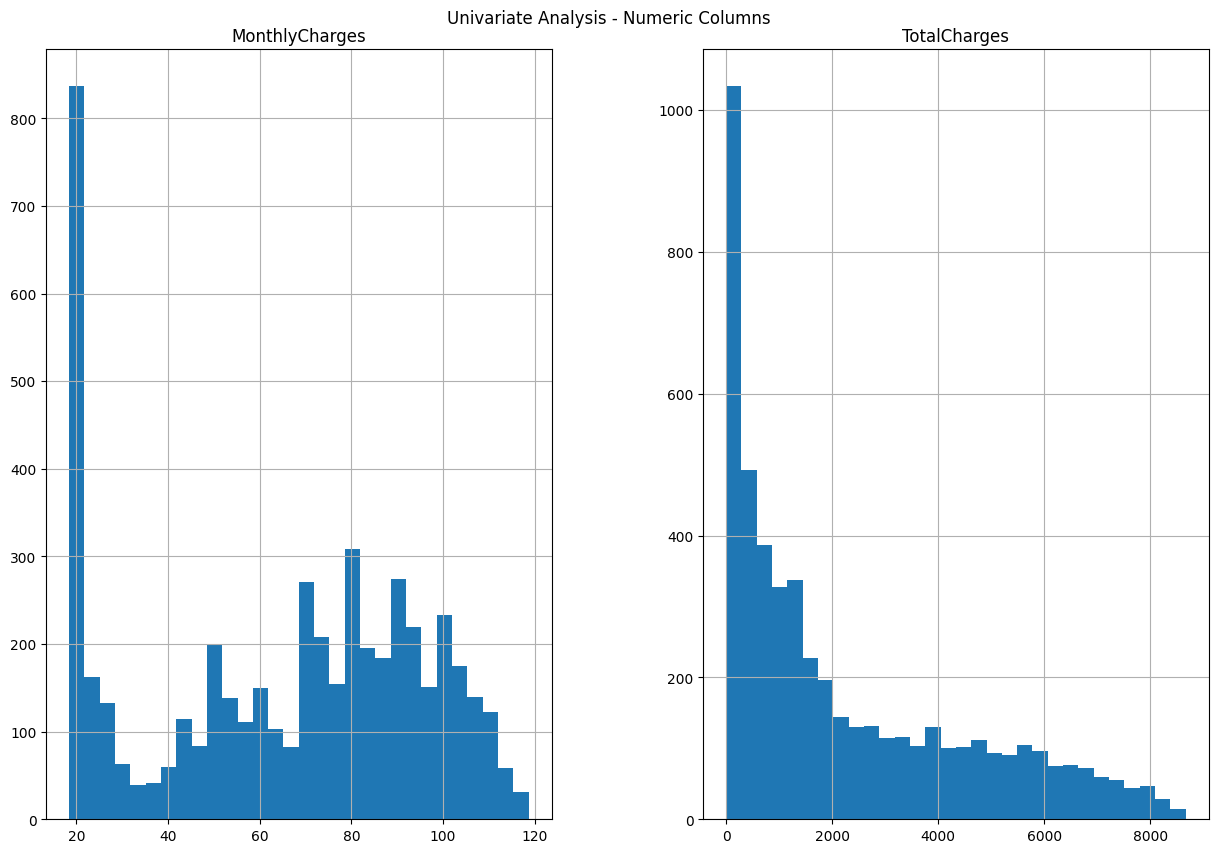

In [44]:
# Univariate Analysis
# Numeric Columns
numeric_columns = ['tenure', 'MonthlyCharges', 'TotalCharges']
df_train[numeric_columns].hist(bins=30, figsize=(15, 10))
plt.suptitle('Univariate Analysis - Numeric Columns', y=0.92)
plt.show()

In [45]:
# Categorical Columns(Univariate)
categorical_columns = ['gender', 'SeniorCitizen', 'Partner', 'Dependents',
                       'PhoneService', 'MultipleLines', 'InternetService',
                       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
                       'TechSupport', 'StreamingTV', 'StreamingMovies',
                       'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']

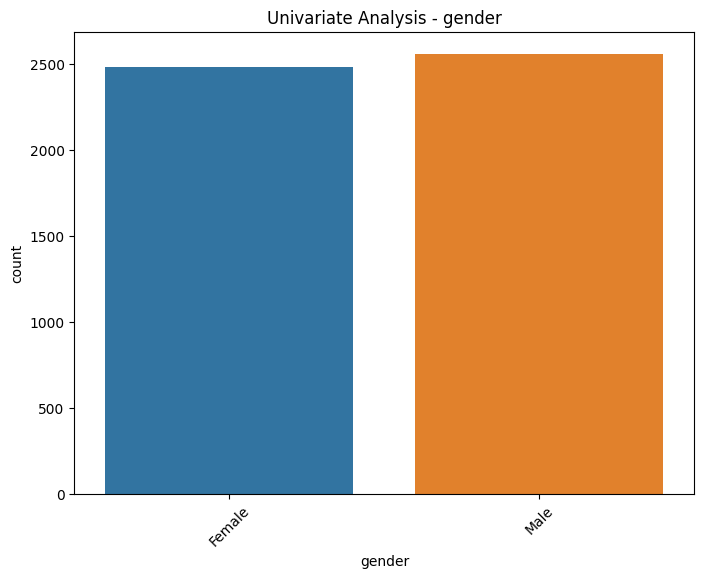

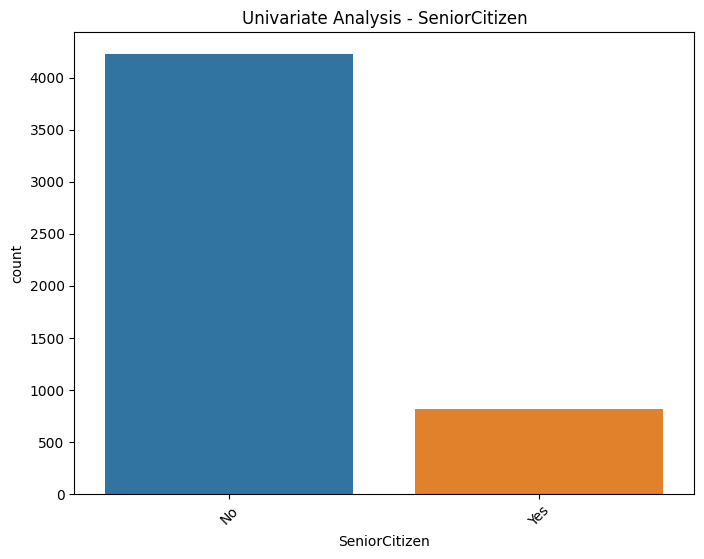

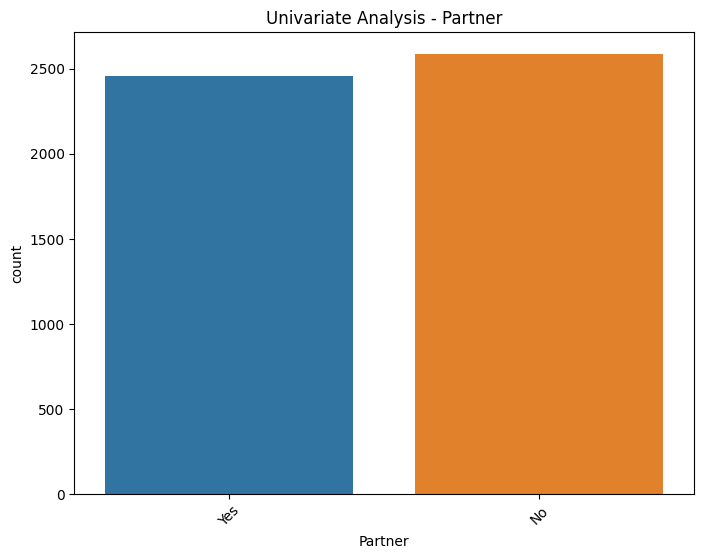

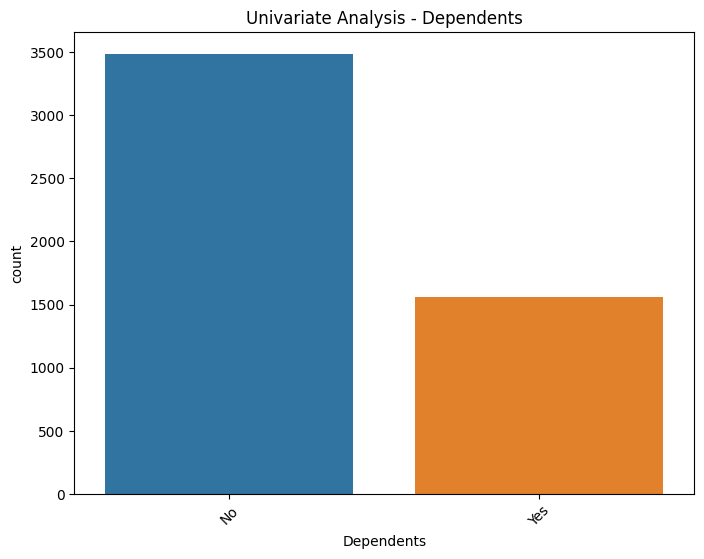

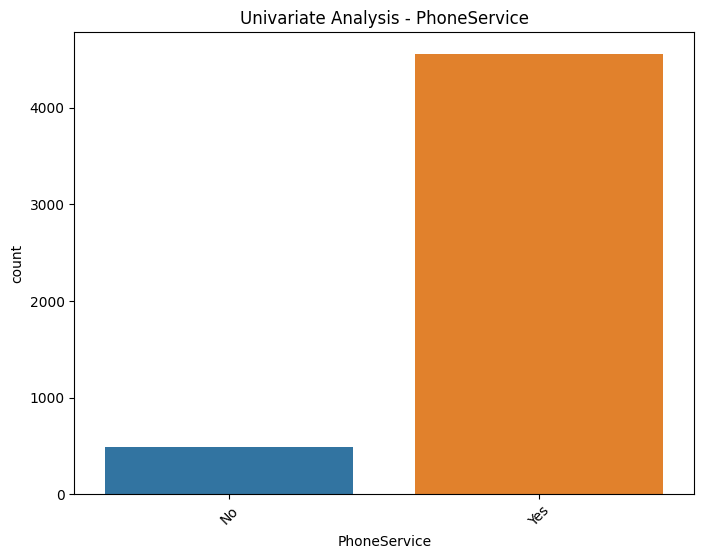

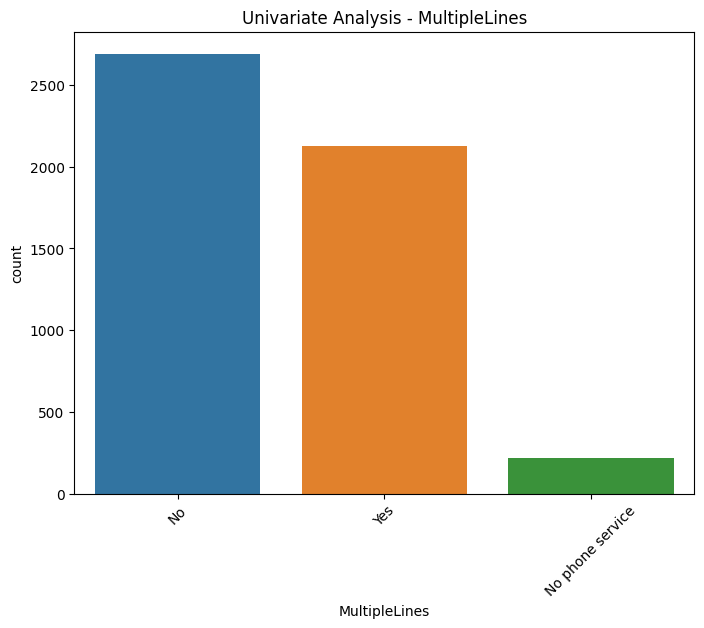

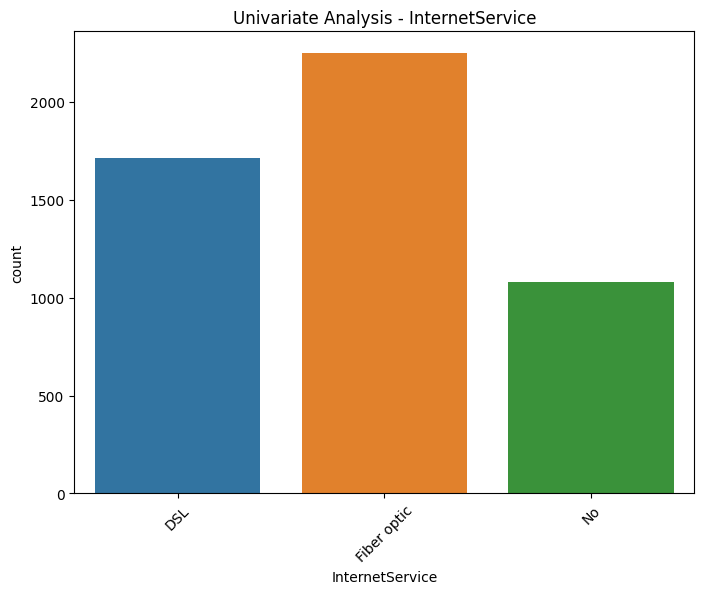

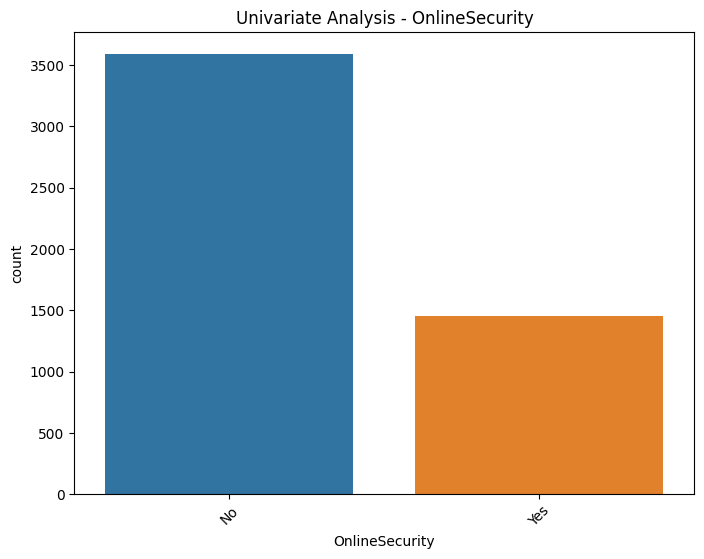

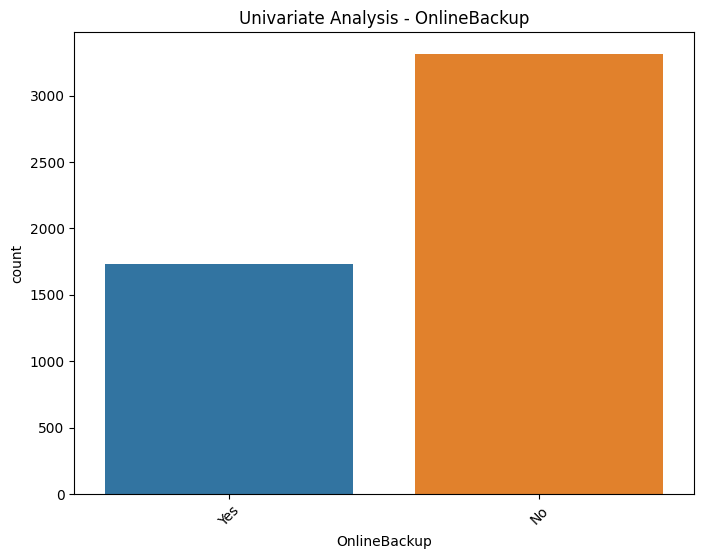

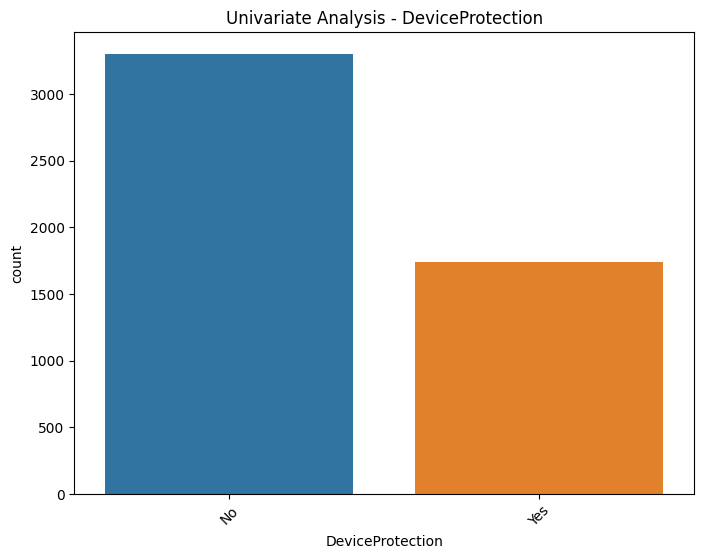

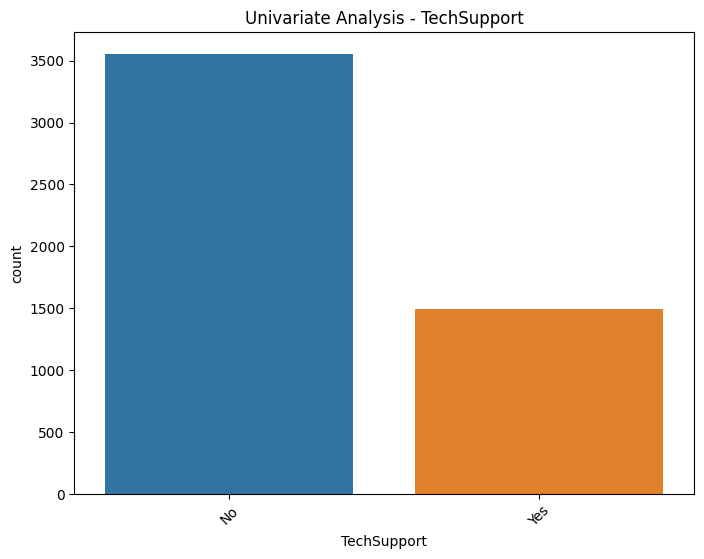

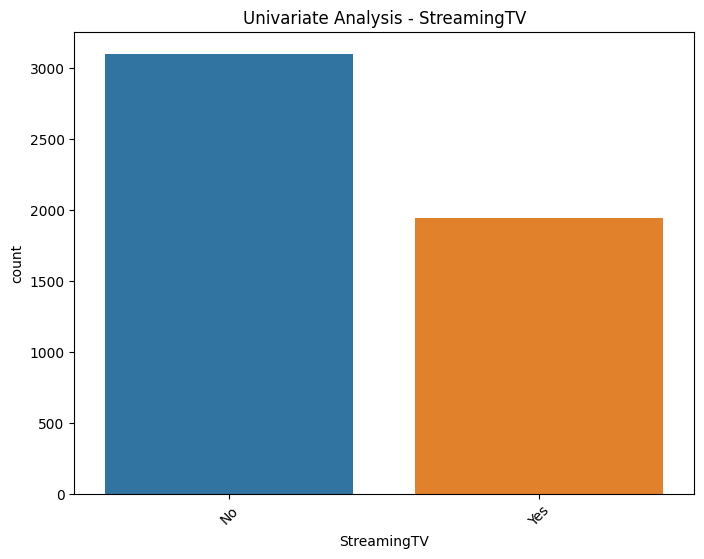

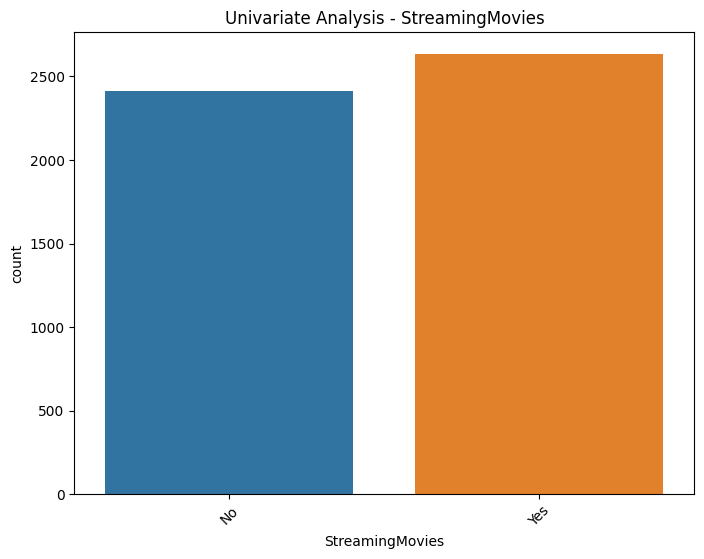

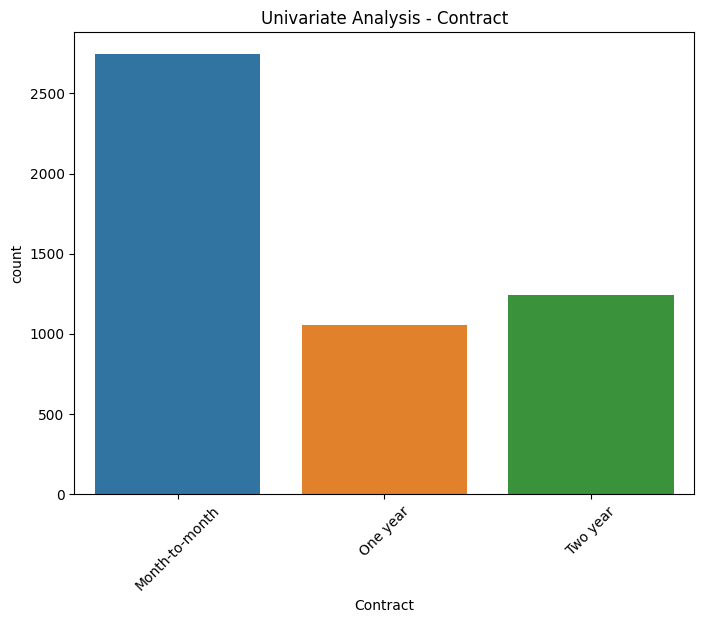

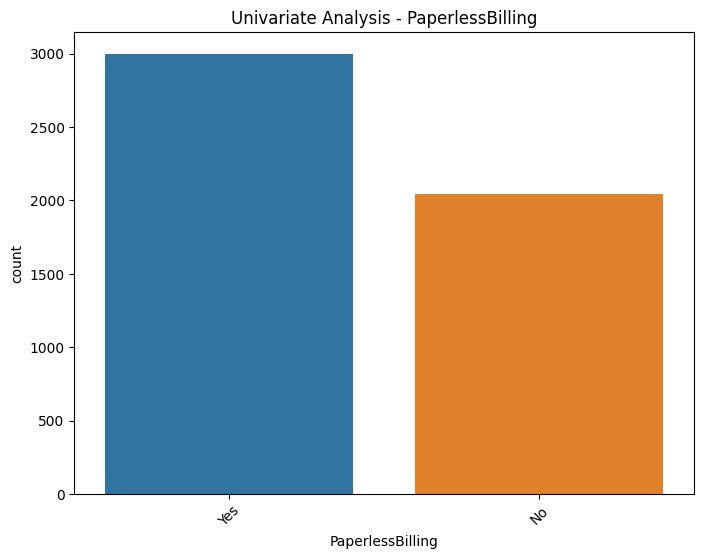

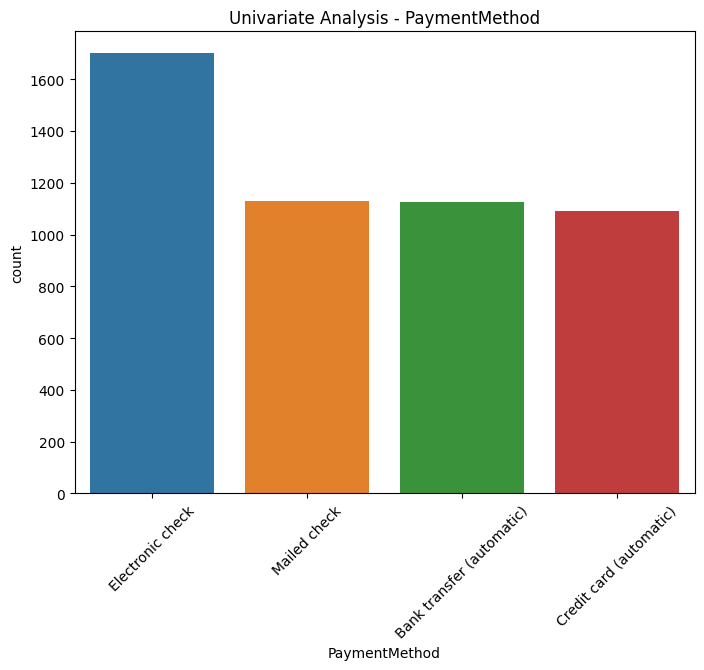

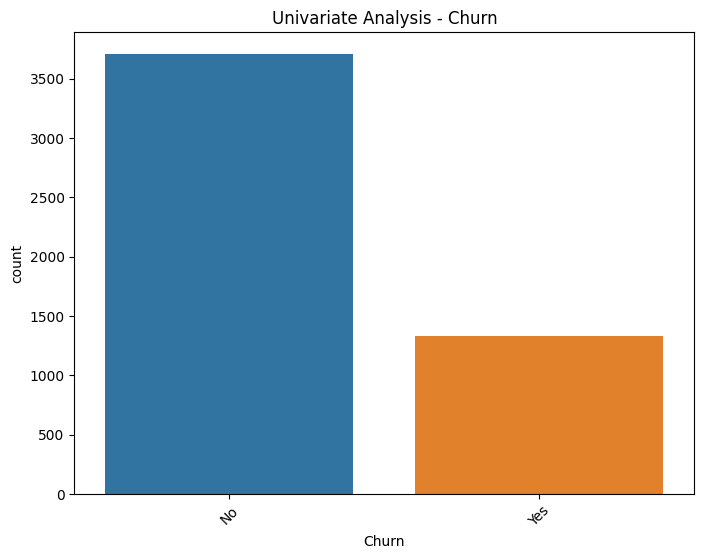

In [46]:
for column in categorical_columns:
    plt.figure(figsize=(8, 6))
    sns.countplot(x=column, data=df_train)
    plt.title(f'Univariate Analysis - {column}')
    plt.xticks(rotation=45)
    plt.show()

## Bivariate Analysis 

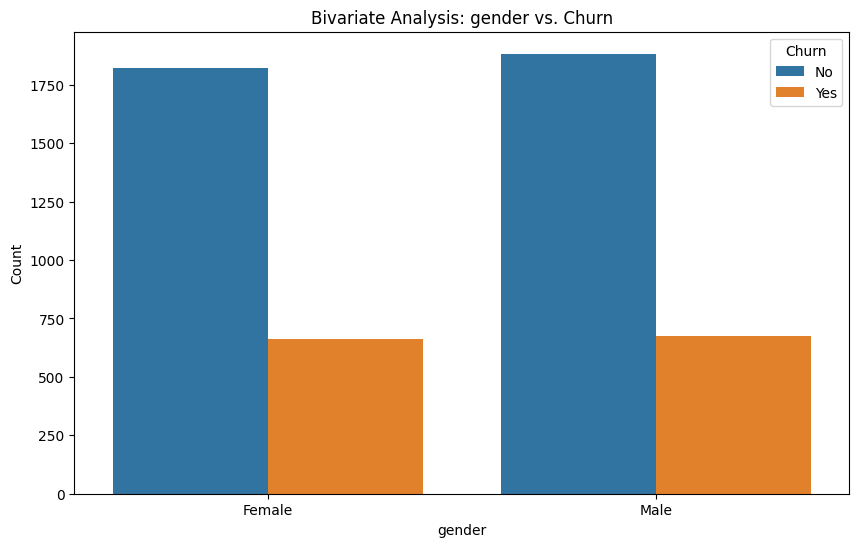

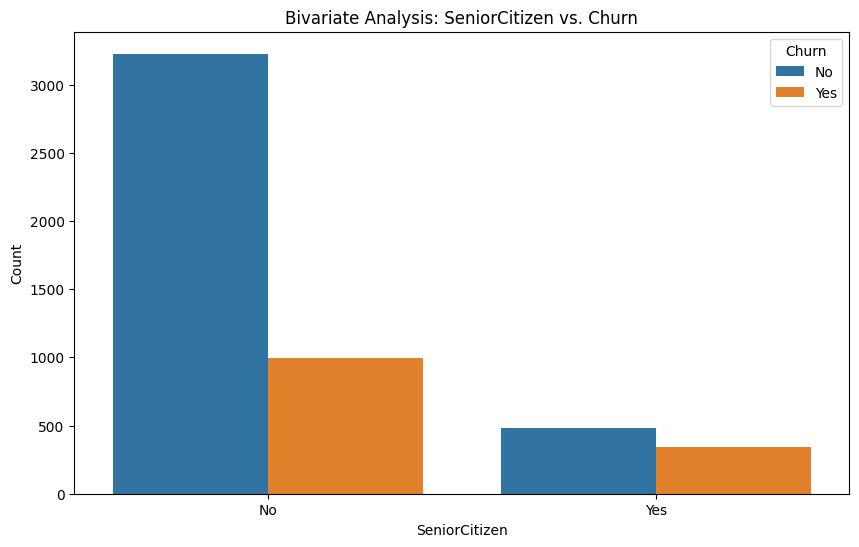

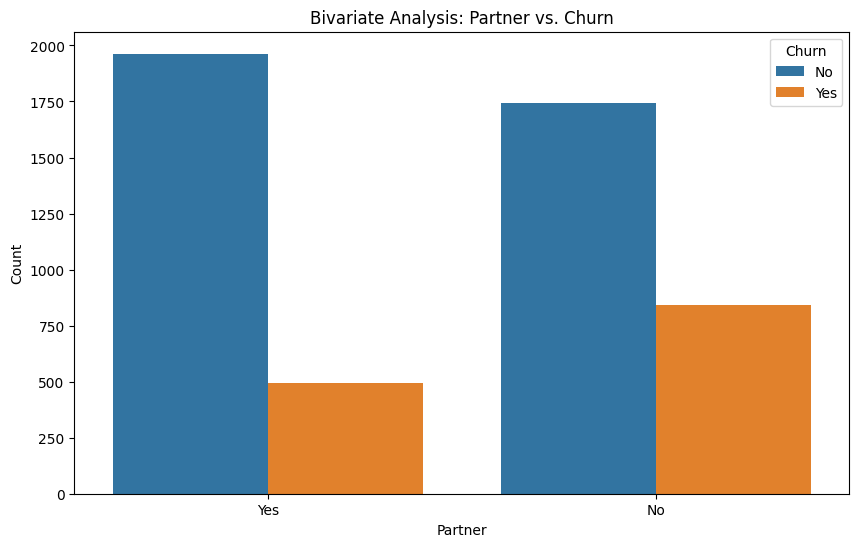

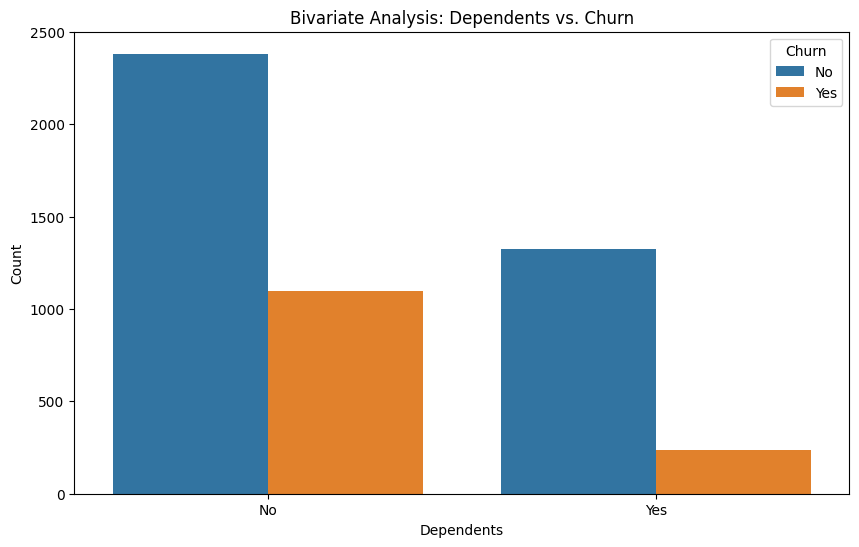

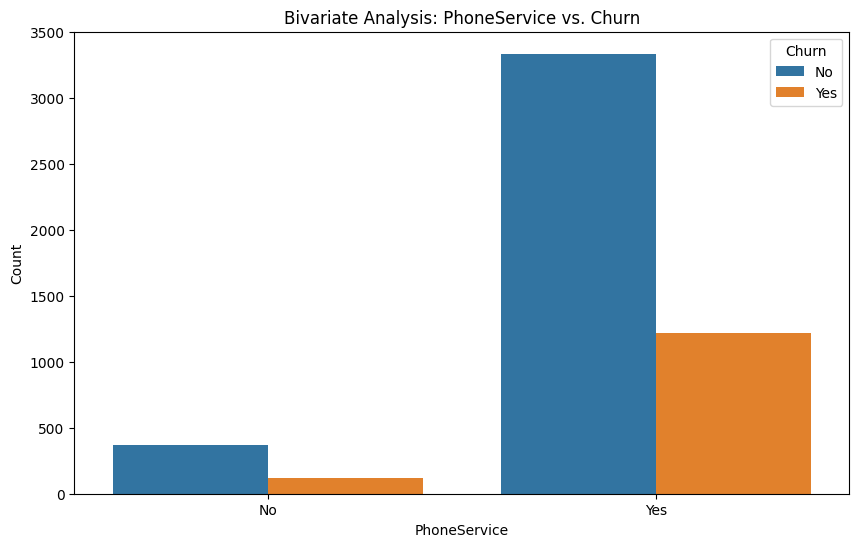

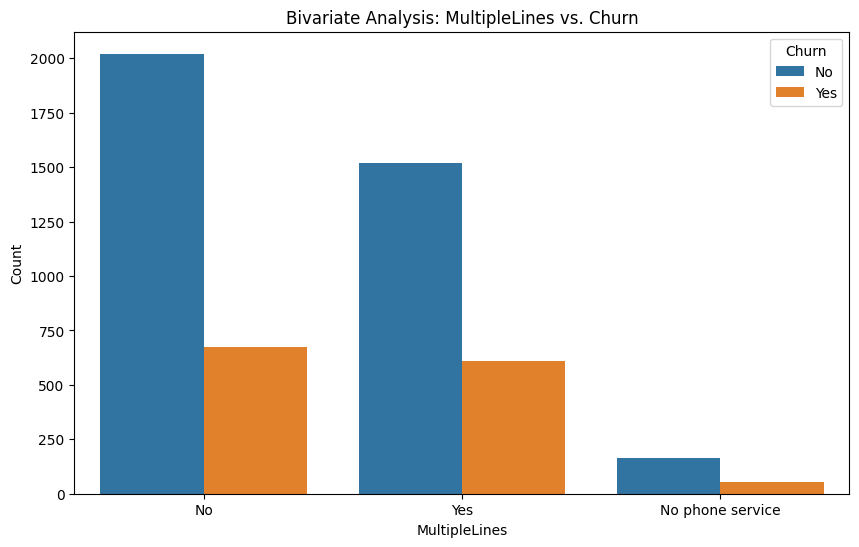

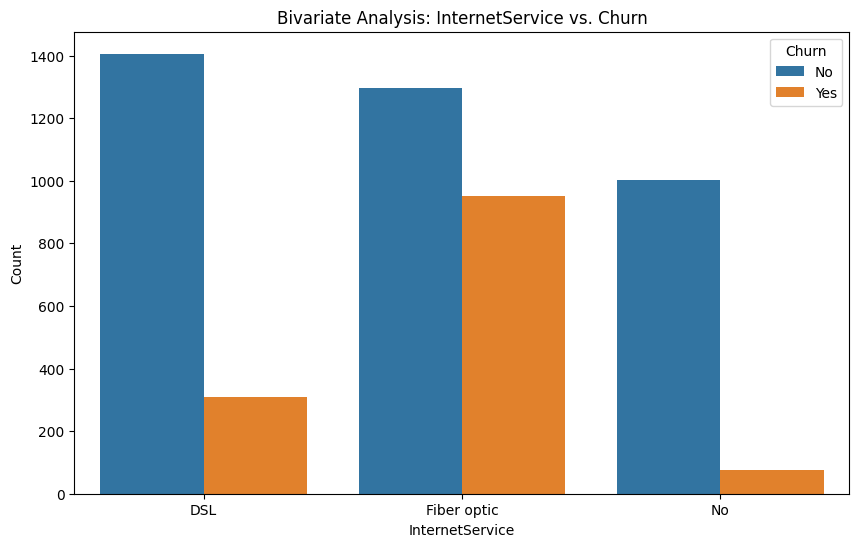

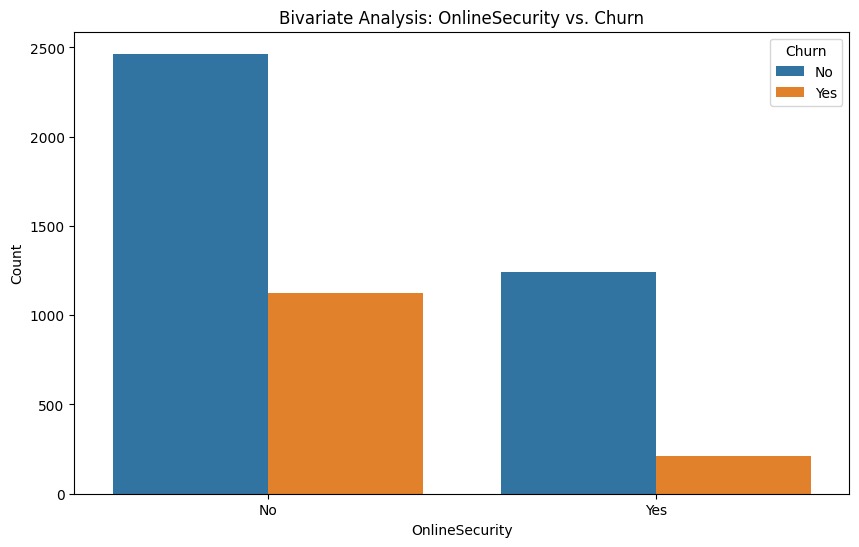

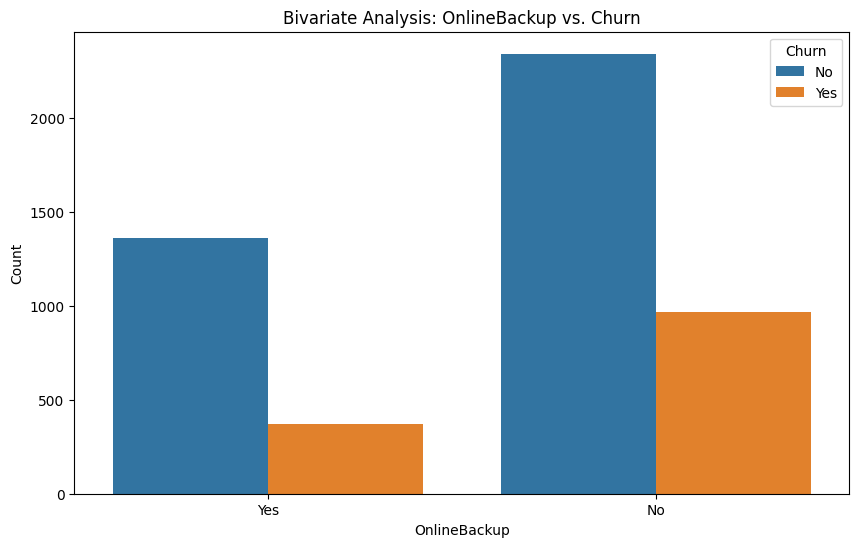

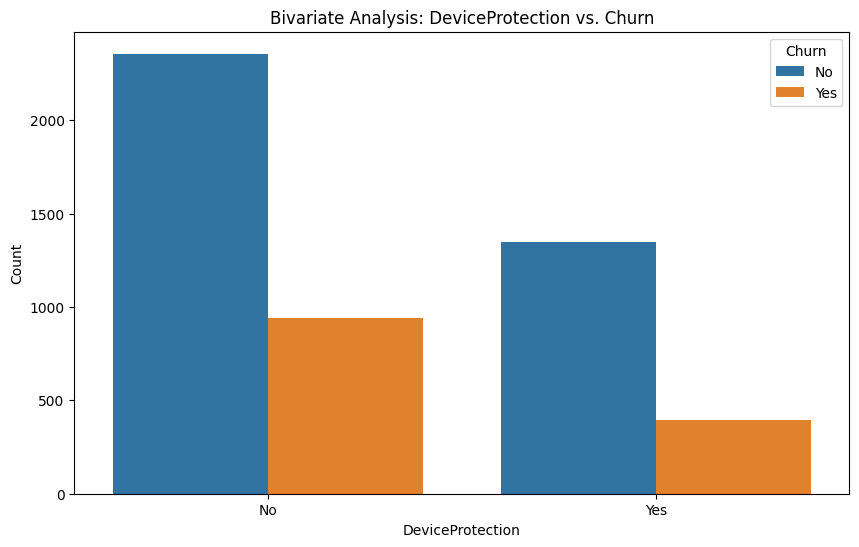

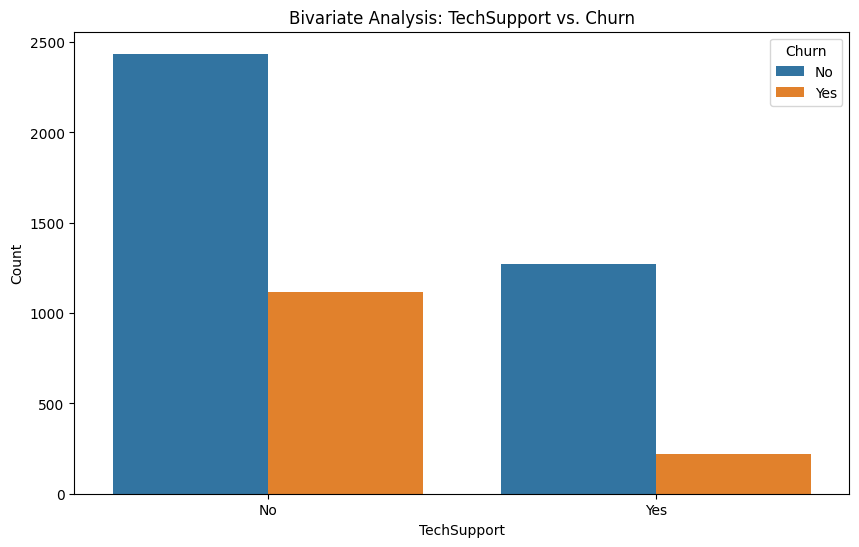

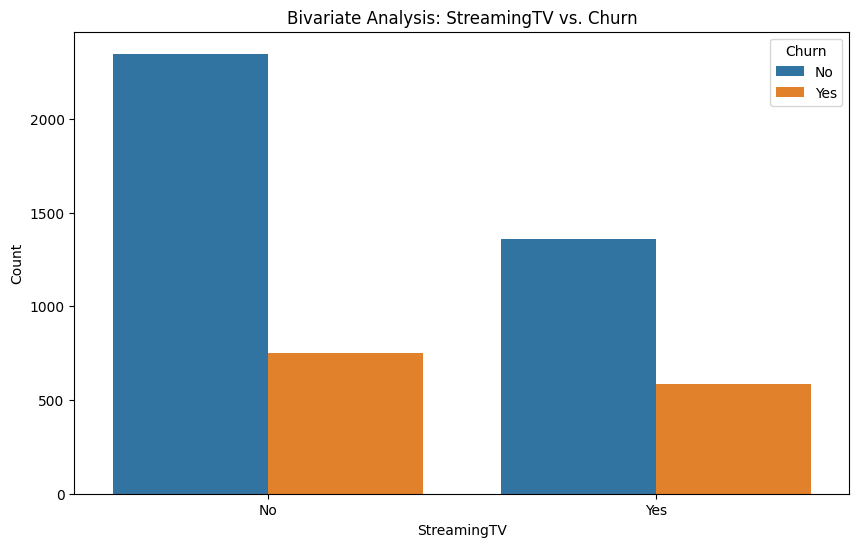

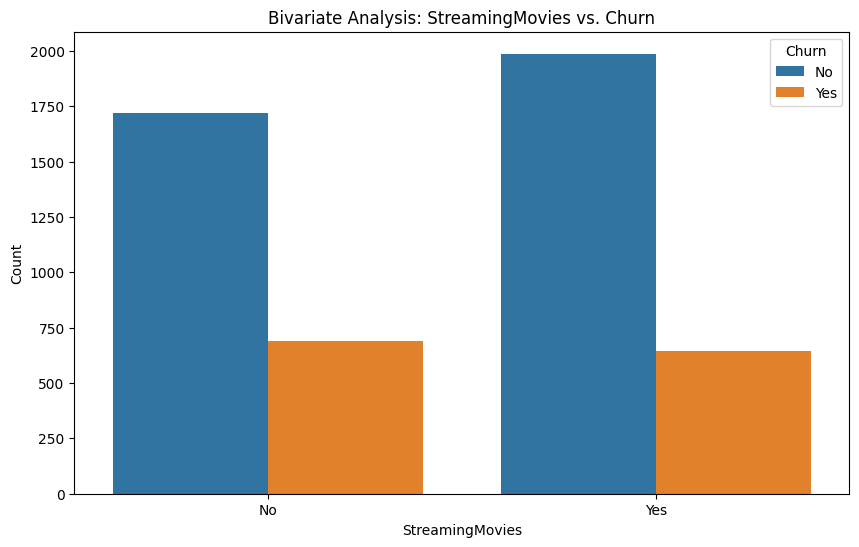

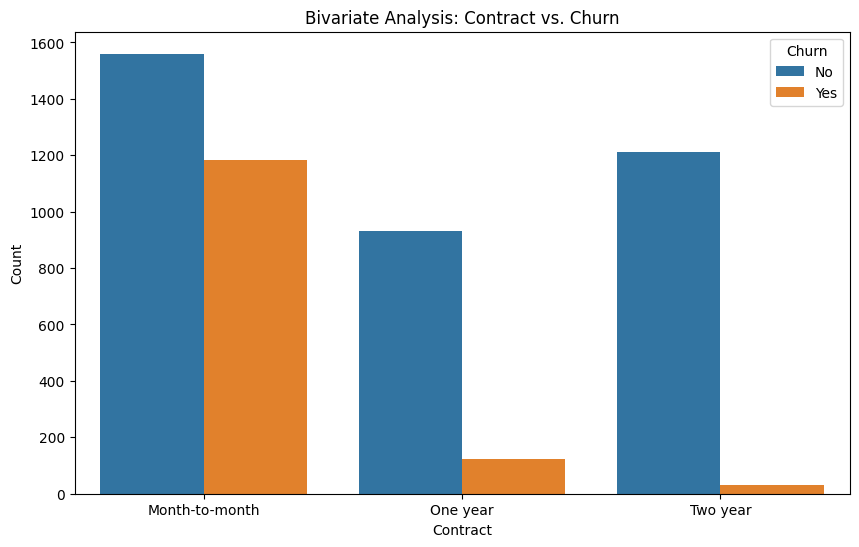

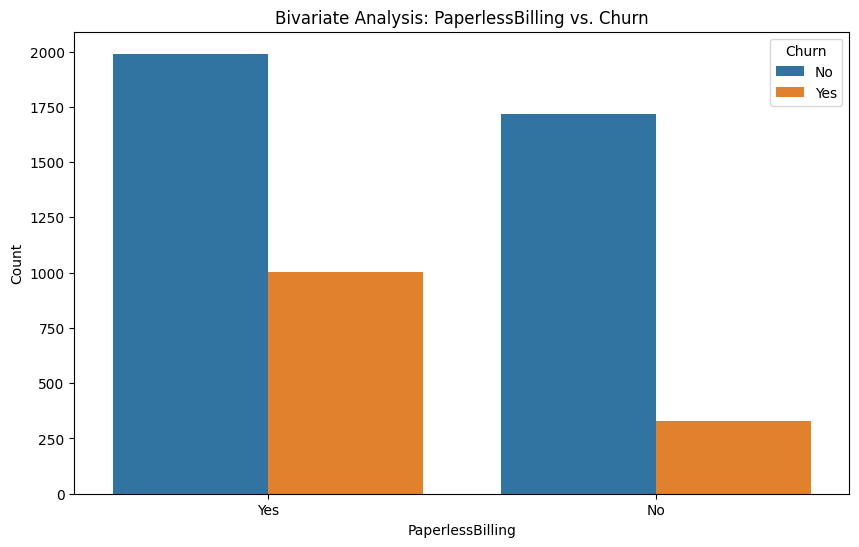

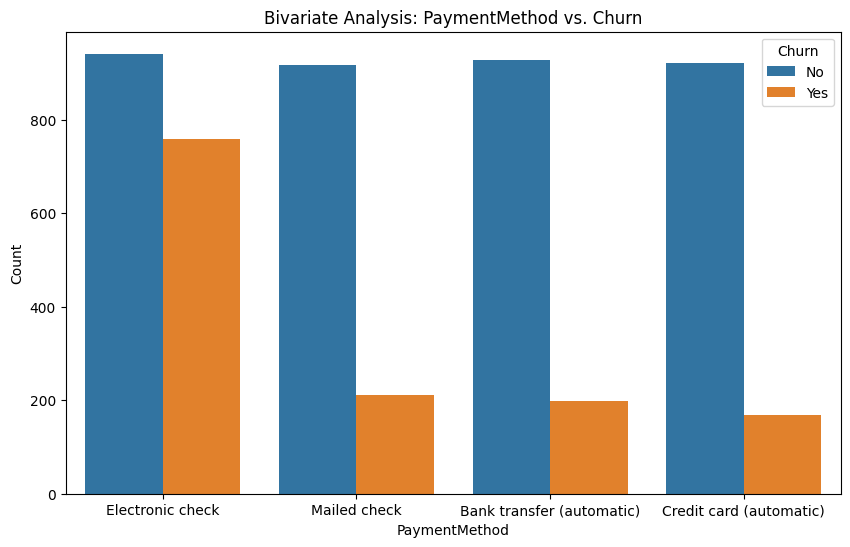

In [47]:
# Bivariate Analysis
for column in categorical_columns:
    if column != 'Churn':
        plt.figure(figsize=(10, 6))
        sns.countplot(x=column, hue='Churn', data=df_train)
        plt.title(f'Bivariate Analysis: {column} vs. Churn')
        plt.xlabel(column)
        plt.ylabel('Count')
        plt.legend(title='Churn', labels=['No', 'Yes'])
        plt.show()

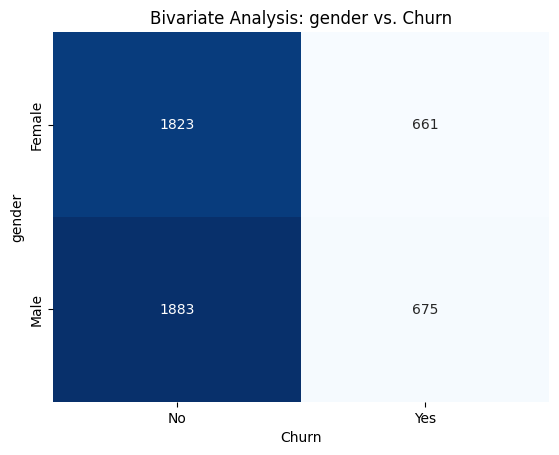

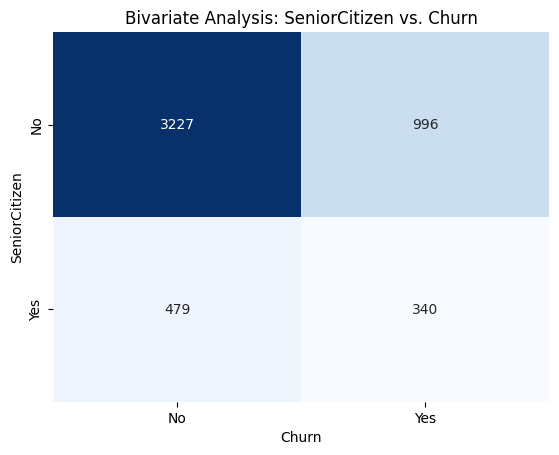

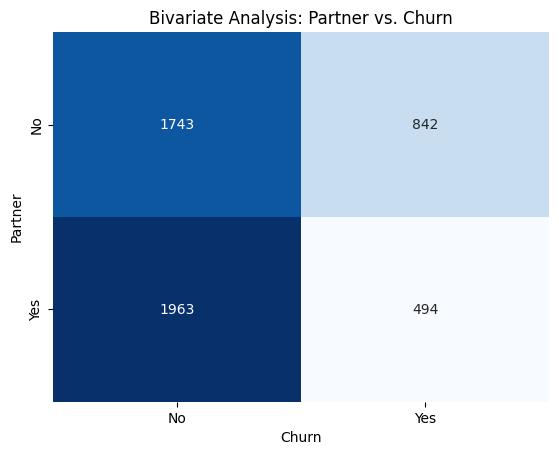

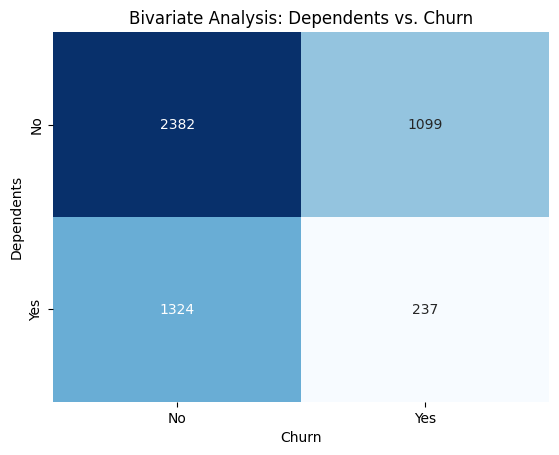

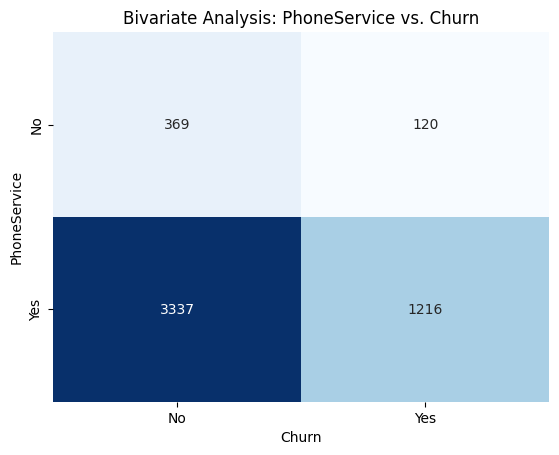

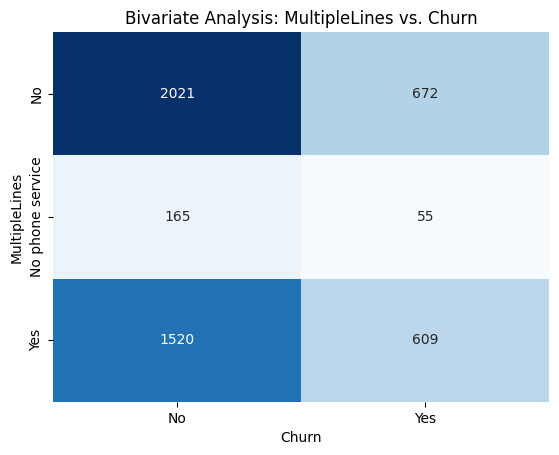

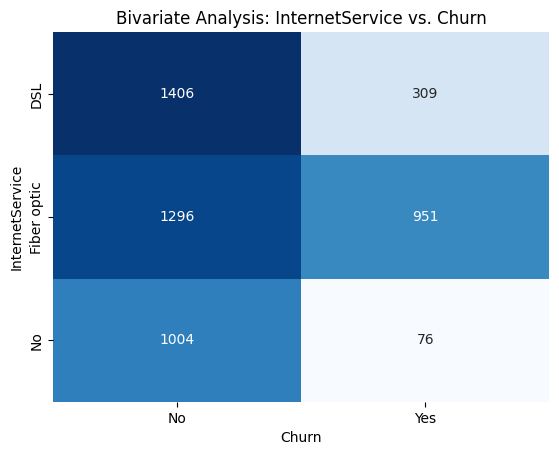

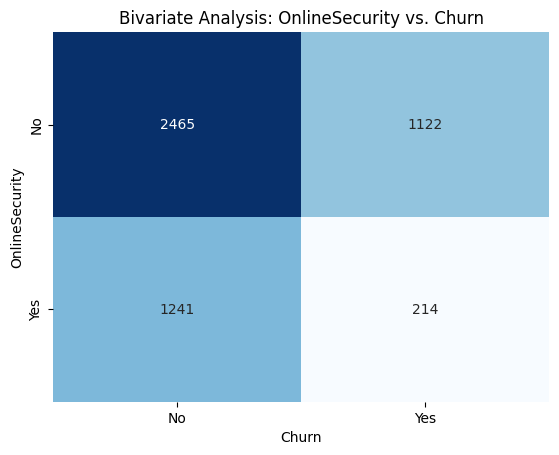

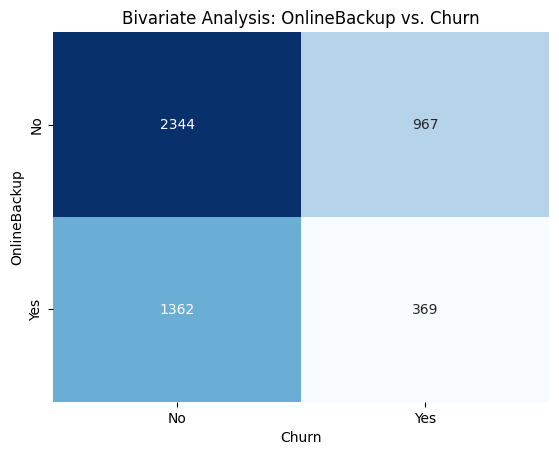

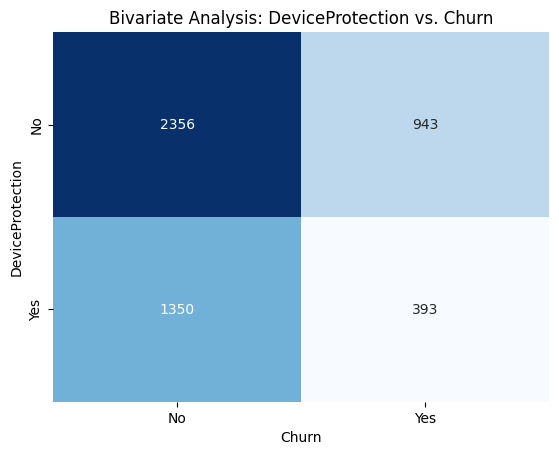

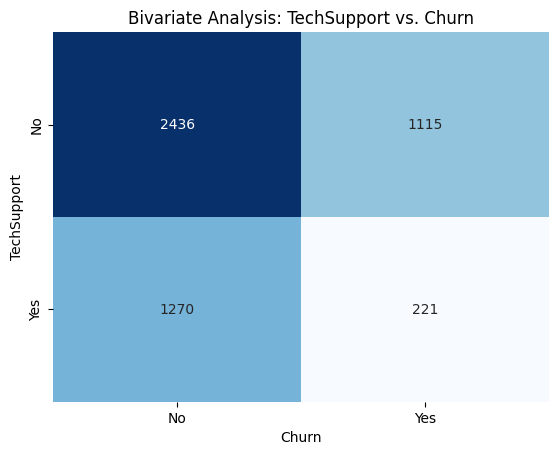

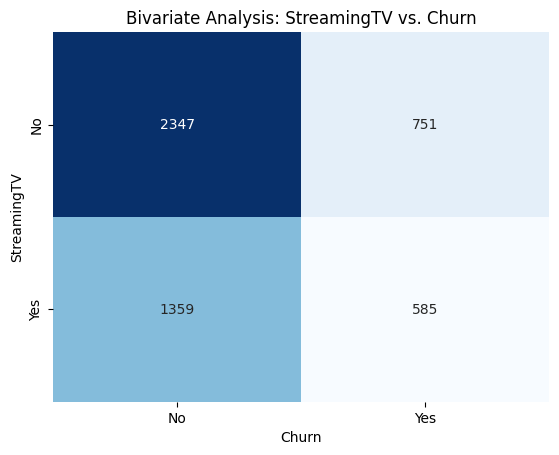

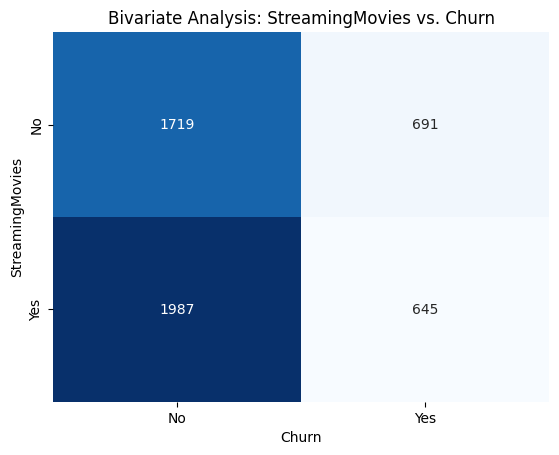

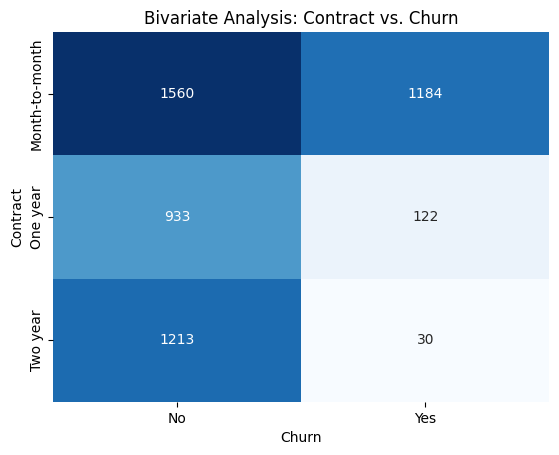

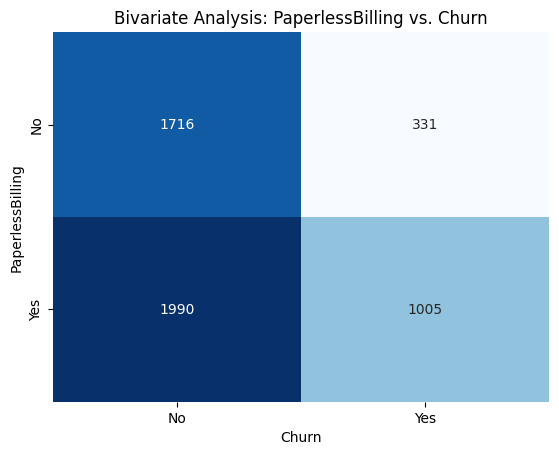

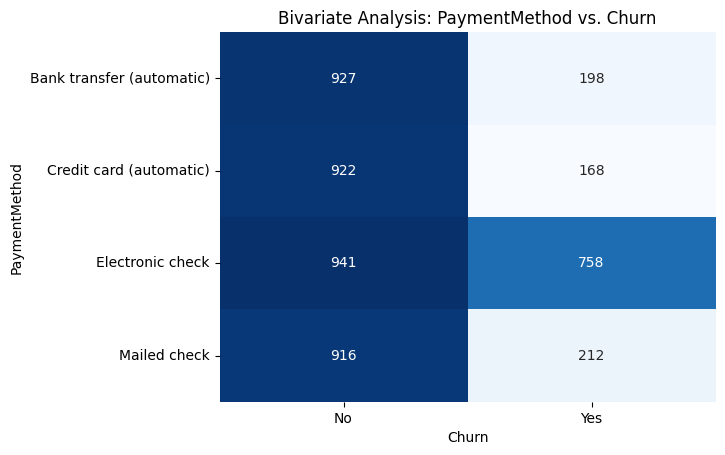

In [48]:
#Bivariate Analysis (with a heatmap)
for column in categorical_columns:
    if column != 'Churn':
        crosstab = pd.crosstab(df_train[column], df_train['Churn'])
        sns.heatmap(crosstab, cmap='Blues', annot=True, fmt='d', cbar=False)
        plt.title(f'Bivariate Analysis: {column} vs. Churn')
        plt.xlabel('Churn')
        plt.ylabel(column)
        plt.show()

## Multivariate Analysis 

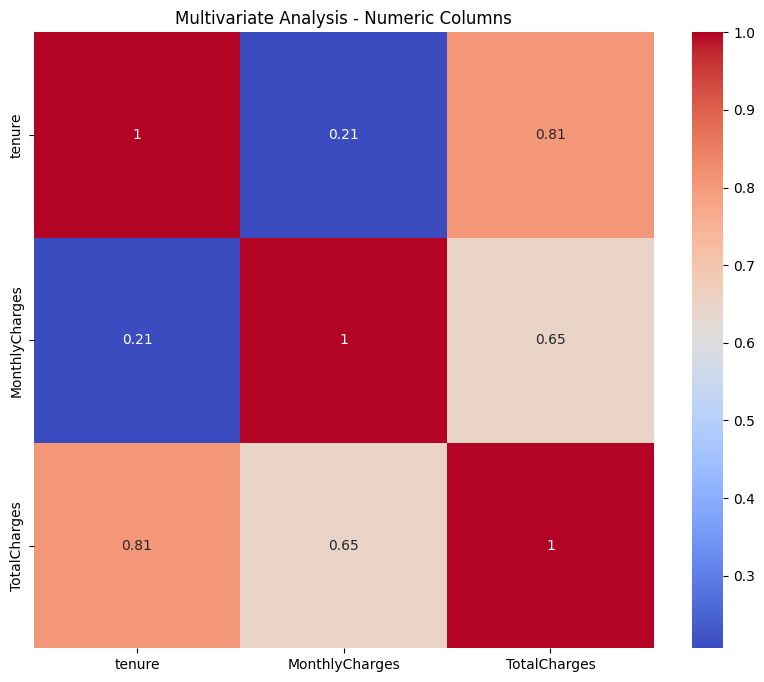

In [62]:
# Multivariate Analysis
# Numeric Columns
numeric_columns = ['tenure', 'MonthlyCharges', 'TotalCharges']
plt.figure(figsize=(10, 8))
sns.heatmap(df_train[numeric_columns].corr(), annot=True, cmap='coolwarm')
plt.title('Multivariate Analysis - Numeric Columns')
plt.show()


* the heatmap's diagonal pattern with correlation coefficients of 1 suggests that there is a strong positive linear relationship between 'tenure' and 'MonthlyCharges', and between 'MonthlyCharges' and 'TotalCharges'. It implies that customers with longer tenure tend to have higher monthly charges and higher total charges, while customers with shorter tenure have lower monthly charges and lower total charges.

* The Target Variable : It is the dependent variable or response variable, is the variable that you want to predict or explain in your analysis or modeling task.

In [50]:
# Target Variable distribution by percentage
100*df_train['Churn'].value_counts()/len(df_train['Churn'])

No     73.488003
Yes    26.492167
Name: Churn, dtype: float64

In [51]:
df_train['Churn'].value_counts()

No     3706
Yes    1336
Name: Churn, dtype: int64

* Data is highly imbalanced, ratio=73:27

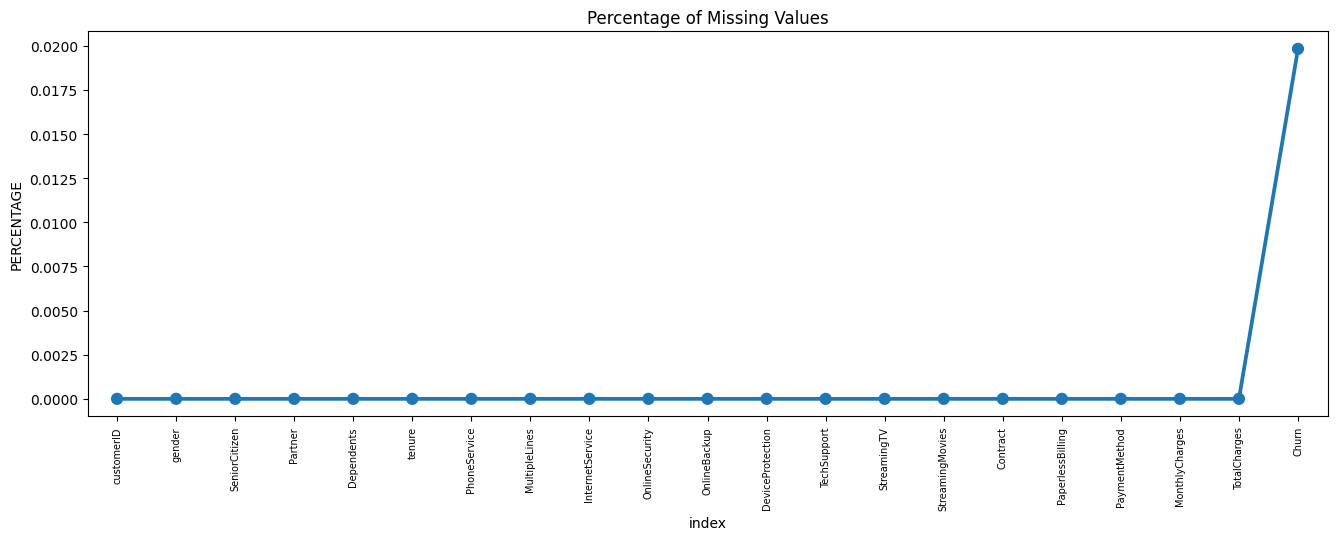

In [53]:
## Finding the percentage of missing values
missing=pd.DataFrame((df_train.isna().sum())*100/df_train.shape[0]).reset_index()
plt.figure(figsize=(16,5))
# ax = sns.pointplot('index',0,data=missing)
ax = sns.pointplot(x='index', y=0, data=missing)

plt.xticks(rotation=90,fontsize=7)
plt.title('Percentage of Missing Values')
plt.ylabel('PERCENTAGE')
plt.show()

## HYPOTHESIS TEST

## H0 - There is no significant difference in churn rates between male and female customers.

## H1 -Is there a significant difference in churn rates between male and female customers?

Hypothesis Test: Chi-Square Test of Independence

* The chi-square test is a statistical test used to determine if there is a significant association between two categorical variables. It is used to analyze whether the observed frequency distribution of categorical data differs significantly from the expected frequency distribution.

In [54]:
contingency_table = pd.crosstab(df_train['gender'], df_train['Churn'])
chi2, p_value, _, _ = chi2_contingency(contingency_table)

# Set the significance level
alpha = 0.05

# Print the results
print("Chi-Square Test of Independence - Gender vs. Churn")
print(f"Chi2 statistic: {chi2}")
print(f"P-value: {p_value}")

# Check the result based on the significance level
if p_value < alpha:
    print("There is a significant association between gender and churn.")
else:
    print("There is no significant association between gender and churn.")


Chi-Square Test of Independence - Gender vs. Churn
Chi2 statistic: 0.021628520637713346
P-value: 0.8830796247912641
There is no significant association between gender and churn.


The Chi2 statistic is a measure of the discrepancy between the observed frequencies and the frequencies that would be expected if the two variables (gender and churn) were independent. A smaller Chi2 statistic indicates a smaller discrepancy.

Our p-value (0.8) is greater than the commonly used significance level of 0.05, we fail to reject the null hypothesis. This means that there is not enough evidence to suggest a significant association between gender and churn. Therefore, we can conclude that gender does not have a significant influence on customer churn based on the available data.

## H0 : The type of internet service does not influence customer churn.

## H1 : Does the type of internet service influence customer churn?

Hypothesis Test: Chi-Square Test of Independence

In [55]:
contingency_table = pd.crosstab(df_train['InternetService'], df_train['Churn'])
chi2, p_value, _, _ = chi2_contingency(contingency_table)

# Set the significance level
alpha = 0.05

# Print the results
print("Chi-Square Test of Independence - Internet Service vs. Churn")
print(f"Chi2 statistic: {chi2:.2f}")
print(f"P-value: {p_value:.2f}")

# Check the result based on the significance level
if p_value < alpha:
    print("There is a significant association between Internet Service and Churn.")
else:
    print("There is no significant association between Internet Service and Churn.")


Chi-Square Test of Independence - Internet Service vs. Churn
Chi2 statistic: 562.27
P-value: 0.00
There is a significant association between Internet Service and Churn.


The chi2 statistic measures the degree of association between the variables (Internet Service and Churn)

the p-value is extremely small (0.00), significantly lower than the common significance level of 0.05, we reject the null hypothesis. This means that there is strong evidence to suggest a significant association between Internet Service and Churn. The result indicates that the type of Internet Service a customer has is likely to have an impact on their likelihood to churn.

## H0 :Customers with a longer tenure more likely to churn.

## H1 : Are customers with a longer tenure less likely to churn?

Hypothesis Test: T-test 

* Ttest is a statistical test used to determine if there is a significant difference between the means of two groups or populations.

In [ ]:
group1 = df_train[df_train['Churn'] == 'No']['tenure'].values
group2 = df_train[df_train['Churn'] == 'Yes']['tenure'].values

t_statistic, p_value = ttest_ind(group1, group2)

# Set the significance level
alpha = 0.05

# Print the results
print("Independent t-test - Tenure vs. Churn")
print(f"T-statistic: {t_statistic:.2f}")
print(f"P-value: {p_value:.2f}")

# Check the result based on the significance level
if p_value < alpha:
    print("There is a significant difference in tenure between churned and non-churned customers.")
else:
    print("There is no significant difference in tenure between churned and non-churned customers.")


Independent t-test - Tenure vs. Churn
T-statistic: 26.59
P-value: 0.00
There is a significant difference in tenure between churned and non-churned customers.


The t-statistic value is 26.60. This value represents the magnitude of the difference in the average tenure between churned and non-churned customers. 

The p-value is 0.00. This value represents the probability of obtaining the observed difference in tenure between churned and non-churned customers by chance alone. In this case, the p-value is extremely small, indicating strong evidence against the null hypothesis (no difference).

## H0 - The payment method does not influence customer churn.

## H1- Does the payment method influence customer churn?

Hypothesis Test: Chi-Square Test of Independence

In [ ]:
contingency_table = pd.crosstab(df_train['PaymentMethod'], df_train['Churn'])
chi2, p_value, _, _ = chi2_contingency(contingency_table)

# Set the significance level
alpha = 0.05

# Print the results
print("Chi-Square Test of Independence - Payment Method vs. Churn")
print(f"Chi2 statistic: {chi2:.2f}")
print(f"P-value: {p_value:.2f}")

# Check the result based on the significance level
if p_value < alpha:
    print("There is a significant association between Payment Method and Churn.")
else:
    print("There is no significant association between Payment Method and Churn.")


Chi-Square Test of Independence - Payment Method vs. Churn
Chi2 statistic: 435.18
P-value: 0.00
There is a significant association between Payment Method and Churn.


A Chi2 statistic of 434.58 indicates a stronger association

The p-value of (0.00) represents the probability of observing the association between Payment Method and Churn by chance alone.

we can conclude that there is a significant association between Payment Method and Churn. The choice of Payment Method appears to have an influence on the likelihood of a customer churning.

## Answering Questions with Visualizations

## Question 1:  Is there a significant difference in churn rates between male and female customers?

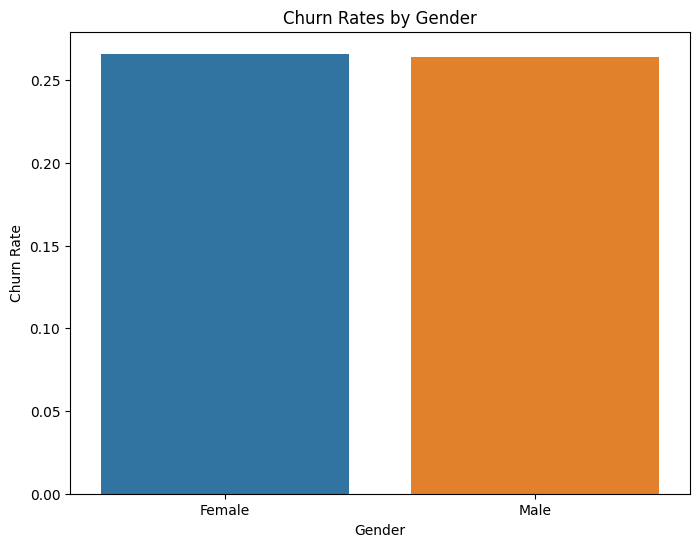

In [56]:
# Create a contingency table of gender and churn
contingency_table = pd.crosstab(df_train['gender'], df_train['Churn'])

# Calculate the churn rates by gender
churn_rates = contingency_table['Yes'] / contingency_table.sum(axis=1)

# Plot the churn rates
plt.figure(figsize=(8, 6))
sns.barplot(x=churn_rates.index, y=churn_rates.values)
plt.title('Churn Rates by Gender')
plt.xlabel('Gender')
plt.ylabel('Churn Rate')
plt.show()


The female churn rate is approximately 0.25 and the male churn rate is approximately 0.23, it suggests that there is a slight difference in churn rates between the two genders. However, the difference is relatively small.

This means that, on average, the churn rate for female customers is slightly higher than the churn rate for male customers, but the difference is not substantial. It indicates that gender alone may not be a strong predictor of customer churn in this dataset. 

## Question 2 : Does the type of internet service influence customer churn

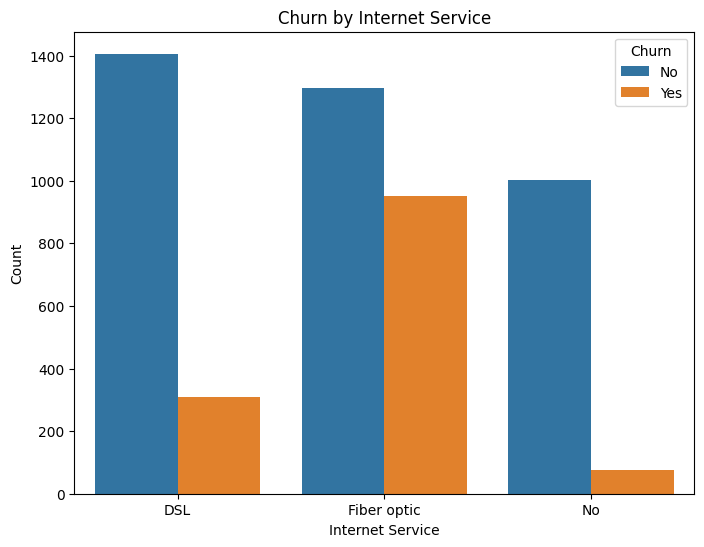

In [57]:
plt.figure(figsize=(8, 6))
sns.countplot(x='InternetService', hue='Churn', data=df_train)
plt.title('Churn by Internet Service')
plt.xlabel('Internet Service')
plt.ylabel('Count')
plt.show()

The results of the visualization indicate that customers with DSL internet service have the highest number of non-churned customers, with a count of 1400. On the other hand, the count of churned customers for DSL internet service is 300. 

This suggests that customers with DSL internet service are less likely to churn compared to other internet service types. Optics, on the other hand, has a lower count of non-churned customers and a higher count of churned customers. 

In summary, the type of internet service does seem to influence customer churn, with DSL internet service showing a lower churn rate compared to other types.

##  Question 3 - Are customers with a longer tenure less likely to churn 

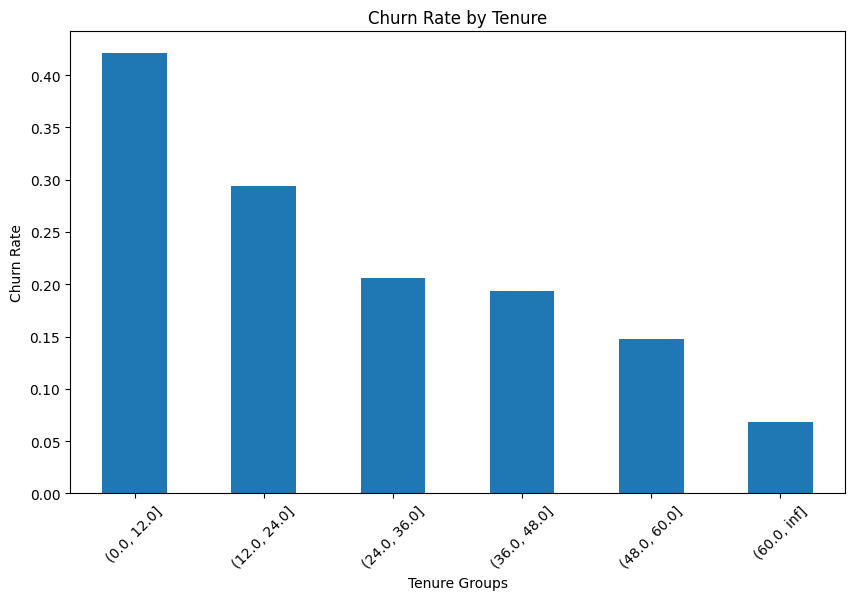

In [60]:
# Calculate churn rate for different tenure groups
tenure_groups = df_train.groupby(pd.cut(df_train['tenure'], bins=[0, 12, 24, 36, 48, 60, float('inf')]))
churn_rate = tenure_groups['Churn'].value_counts(normalize=True).unstack()['Yes']

# Plot the churn rate
plt.figure(figsize=(10, 6))
churn_rate.plot(kind='bar')
plt.title('Churn Rate by Tenure')
plt.xlabel('Tenure Groups')
plt.ylabel('Churn Rate')
plt.xticks(rotation=45)
plt.show()


Customers with a tenure of 0-12 months have the highest churn rate of 0.4. This indicates that customers who are relatively new to the service are more likely to churn. It could be because they are still in the early stages of evaluating the service or may have encountered issues that led to dissatisfaction.

Customers with a tenure of 24-36 months have a lower churn rate of 0.2. This suggests that customers who have been with the service for a moderate amount of time are less likely to churn compared to those with shorter tenures. 

Customers with a tenure of 60 months and above have the lowest churn rate of 0.05. This indicates that customers who have been with the service for a longer duration are significantly less likely to churn. These customers have likely developed a strong relationship with the service provider, are satisfied with the service, and may have a higher level of loyalty. 

In summary, the results suggest that there is a correlation between tenure and churn rate. Customers with longer tenures are indeed less likely to churn compared to those with shorter tenures. 

## Question 4 : Does the payment method influence customer churn?

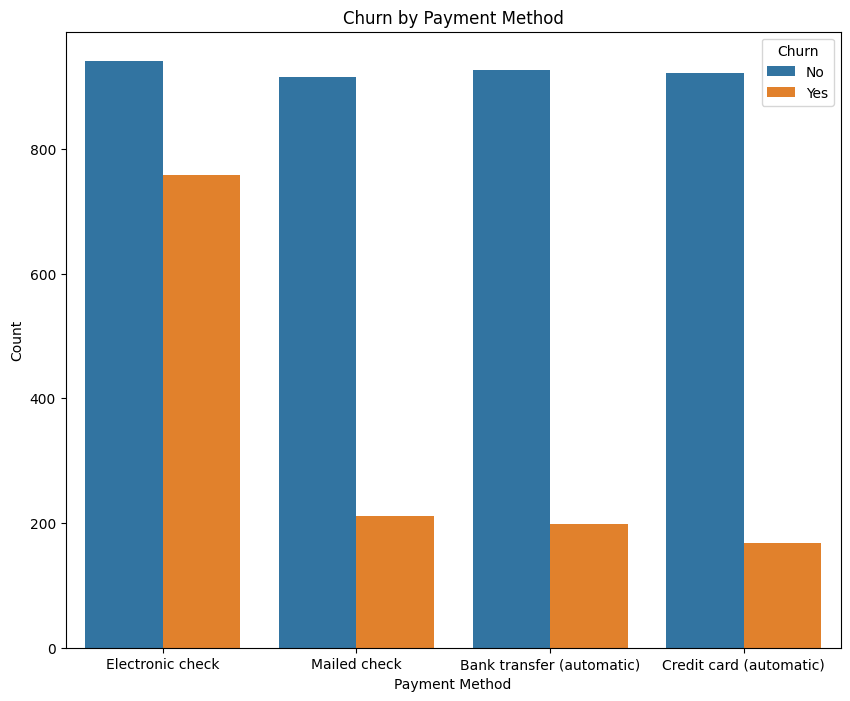

In [61]:
plt.figure(figsize=(10, 8))
sns.countplot(x='PaymentMethod', hue='Churn', data=df_train)
plt.title('Churn by Payment Method')
plt.xlabel('Payment Method')
plt.ylabel('Count')
plt.show()

The results of the visualization indicate that the payment method of "Electronic check" has the highest count of both non-churned and churned customers, with approximately 900 non-churned and 750 churned customers. On the other hand, the payment methods "Mail check," "Bank transfer (automatic)," and "Credit card (automatic)" have a relatively similar number of customers at around 900, but their churn count is significantly lower at approximately 200.

This suggests that the payment method of "Electronic check" has a higher churn rate compared to other payment methods. Customers who use electronic checks as their payment method are more likely to churn compared to customers who use other payment methods such as mail check, bank transfer (automatic), or credit card (automatic).

In summary, the payment method does seem to influence customer churn, with electronic check users having a higher churn rate compared to other payment methods.

In [ ]:
df_train.to_csv('Attrition Train.csv')